In [23]:
import pandas as pd

food_data= pd.read_csv("C:/Users/shaha74/.spyder-py3/food_orders_new_delhi.csv")
food_data.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0


In [24]:
food_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    815 non-null    object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB


In [25]:
from datetime import datetime

#converting date and time columns to datetime format
food_data["Order Date and Time"]=pd.to_datetime(food_data["Order Date and Time"])
food_data["Delivery Date and Time"]=pd.to_datetime(food_data["Delivery Date and Time"])

#extracting the Discount percentage from discount column
food_data["Discount Percentage"] = food_data["Discounts and Offers"].str.extract('(\d+)').astype(float)
#filling 0 where no discount is applied
food_data["Discount Percentage"]=food_data["Discount Percentage"].fillna(0.0)
food_data["Discount Amount"]=(food_data["Order Value"]*food_data["Discount Percentage"])/100
food_data.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Discount Percentage,Discount Amount
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0,5.0,95.70
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,10.0,98.60
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0,15.0,140.55
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0,0.0,0.00
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0,50.0,996.00


In [26]:
#calculating total cost, revenue per order
food_data["Cost per order"] = (food_data["Delivery Fee"] + food_data["Payment Processing Fee"] +
 food_data["Refunds/Chargebacks"] + food_data["Discount Amount"])
food_data["Revenue per order"] = food_data["Commission Fee"]
food_data["Profit per order"] = food_data["Revenue per order"] - food_data["Cost per order"]

#calculating total cost and profit for all the orders
print("Total number of Orders ",food_data.shape[0])
print("Total Cost",food_data["Cost per order"].sum())
print("Total Revenue",food_data["Revenue per order"].sum())
print("Total Profit",food_data["Profit per order"].sum())


Total number of Orders  1000
Total Cost 261009.84999999998
Total Revenue 126990
Total Profit -134019.85


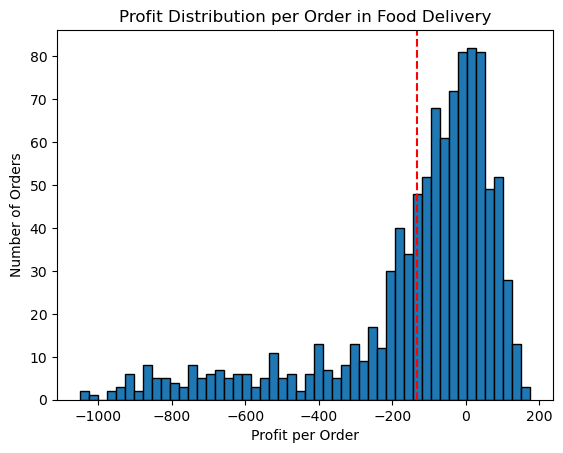

In [27]:
import matplotlib.pyplot as plt
plt.figure()
plt.hist(food_data['Profit per order'],bins=50,edgecolor="black")
plt.title('Profit Distribution per Order in Food Delivery')
plt.xlabel('Profit per Order')
plt.ylabel('Number of Orders')
plt.axvline(food_data["Profit per order"].mean(),color="red",linestyle="--")
plt.show()


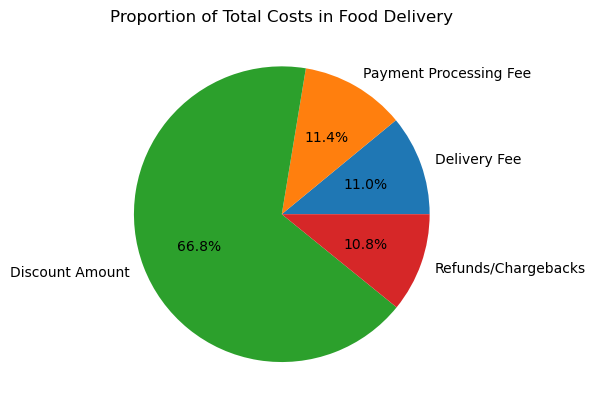

In [28]:
plt.figure()
costs_breakdown = food_data[['Delivery Fee', 'Payment Processing Fee', 'Discount Amount',
                             'Refunds/Chargebacks']].sum()
plt.pie(costs_breakdown,labels=costs_breakdown.index,autopct='%1.1f%%')
plt.title('Proportion of Total Costs in Food Delivery')
plt.show()

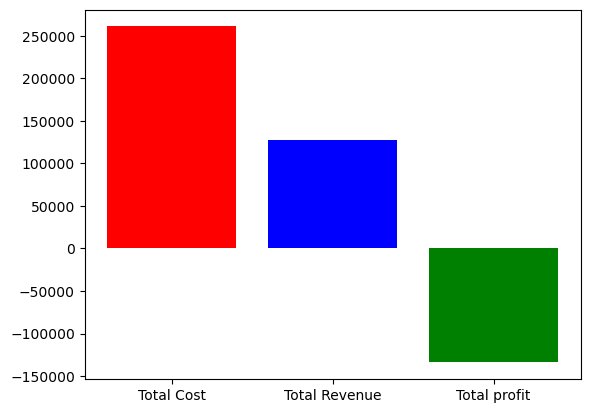

In [29]:
Total=["Total Cost","Total Revenue","Total profit"]
Value=[(food_data["Cost per order"].sum()),(food_data["Revenue per order"].sum()),
       (food_data["Profit per order"].sum())]
plt.figure()
plt.bar(Total,Value,color=["Red","Blue","Green"])
plt.show()

# A New stratergy for Profit

In [30]:
#Calculating old discount and commission percentages
old_commission_percentage=(food_data["Commission Fee"]/food_data["Order Value"])*100
old_discount_percentage=(food_data["Discount Amount"]/food_data["Order Value"])*100
print("The old commission percentage ",old_commission_percentage.mean())
print("The old dicount percentage ",old_discount_percentage.mean())


The old commission percentage  19.750890168545332
The old dicount percentage  16.265


In [31]:
#Calculating new commission and discount percentages
#sorting onl the profitable orders
profitable_orders=food_data[food_data["Profit per order"]>0]
profitable_orders['Commission Percentage'] = (profitable_orders['Commission Fee'] / profitable_orders['Order Value']) * 100
print("new_commission_percentage",profitable_orders["Commission Percentage"].mean())
#directly using the discount percentage column for new average discount percentage
print("new_discount_percentage",profitable_orders["Discount Percentage"].mean())


new_commission_percentage 31.59734746146822
new_discount_percentage 5.7975460122699385


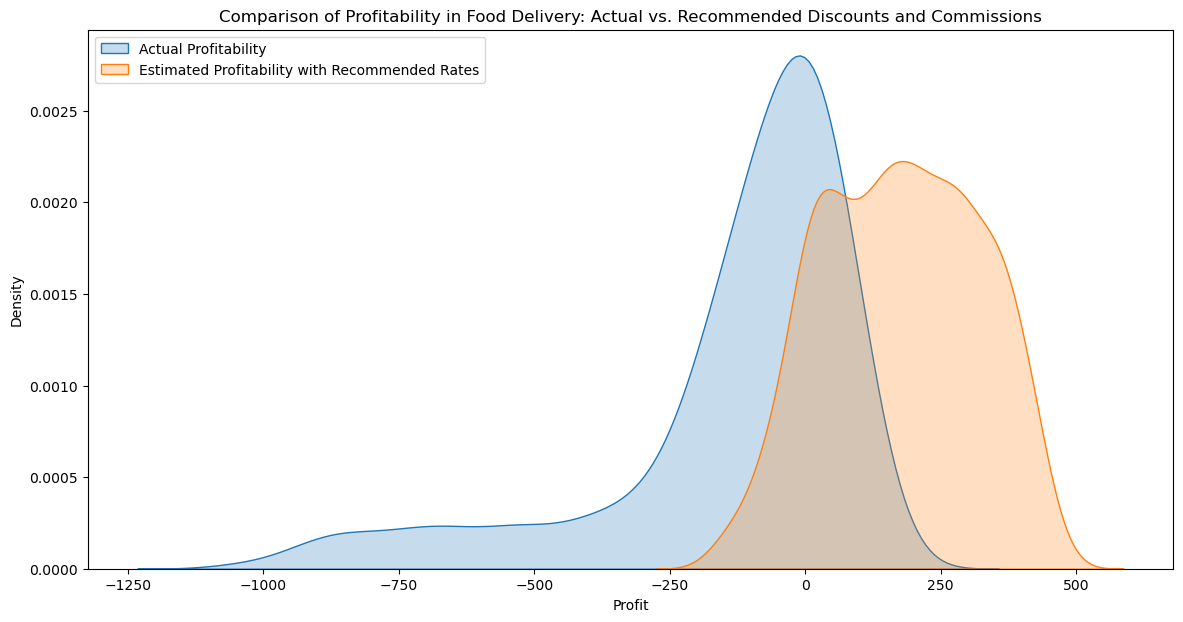

In [32]:
# simulate profitability with recommended discounts and commissions
recommended_commission_percentage = 31.0 # 31%
recommended_discount_percentage = 6.0 # 5.79% rounding off to 6
food_data['Predicted Commission Fee'] = food_data["Order Value"]*(recommended_commission_percentage/100)
food_data['Predicted Dicount Amount'] = food_data["Order Value"]*(recommended_discount_percentage/100)

#recalculating total costs and profit after applying predicted values
food_data["Predicted Total Cost"]=(food_data["Delivery Fee"]+food_data["Payment Processing Fee"]+
food_data["Refunds/Chargebacks"]+food_data["Predicted Dicount Amount"])
food_data["Predicted Profit"]=food_data['Predicted Commission Fee']-food_data["Predicted Total Cost"]

import seaborn as sns
plt.figure(figsize=(14, 7))
sns.kdeplot(food_data["Profit per order"],fill=True,label='Actual Profitability')
sns.kdeplot(food_data["Predicted Profit"],fill=True,label='Estimated Profitability with Recommended Rates')
plt.title('Comparison of Profitability in Food Delivery: Actual vs. Recommended Discounts and Commissions')
plt.xlabel('Profit')
plt.ylabel('Density')
plt.legend(loc="upper left")
plt.show()